In [1]:
#loading the python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\force2020_data_unsupervised_learning.csv')
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [4]:
#checking for null values
df.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [5]:
#dropping the null values
df.dropna(inplace=True)

In [6]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


Exploratory Data Analysis

In [7]:
#checking the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12202 entries, 4238 to 16439
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      12202 non-null  float64
 1   GR        12202 non-null  float64
 2   DEPTH_MD  12202 non-null  float64
 3   NPHI      12202 non-null  float64
 4   PEF       12202 non-null  float64
 5   DTC       12202 non-null  float64
dtypes: float64(6)
memory usage: 667.3 KB


In [8]:
#summary statistics for the dataset
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


Scaling the Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
#columns in the dataset
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [11]:
df=df.drop('DEPTH_MD',axis=1)

In [12]:
df[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]=scaler.fit_transform(df[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])


In [13]:
df.columns

Index(['RHOB', 'GR', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [14]:
df

,RHOB,GR,NPHI,PEF,DTC
4238,-1.491843,-0.179292,2.523654,-1.255364,0.869531
4239,-1.387067,-0.010859,2.770744,-1.247886,0.690042
4240,-1.320646,0.028875,2.524300,-1.247450,0.554350
4241,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4242,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...
16435,1.265151,0.979338,-0.524699,0.433103,-1.149449
16436,1.222550,0.921870,-0.456081,0.433103,-1.158891
16437,1.110101,1.032560,-0.356250,0.433103,-1.105910
16438,1.095199,1.157682,-0.339430,0.722114,-1.095690


In [15]:
#import the kmeans model
from sklearn.cluster import KMeans
# Initializing an empty list to store inertia scores for KMeans clustering.
inertia_scores=[]
# Iterating over a range of cluster numbers from 1 to 10 for each number of clusters (i):
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia_scores.append(kmeans.inertia_)

In [16]:
inertia_scores

[61009.99999999994,
 30340.11685718533,
 22915.0972287076,
 16325.684443353635,
 13804.809703167071,
 11416.429358087009,
 9903.569174843236,
 8882.233636940944,
 7968.217444833612,
 7305.85592000738]

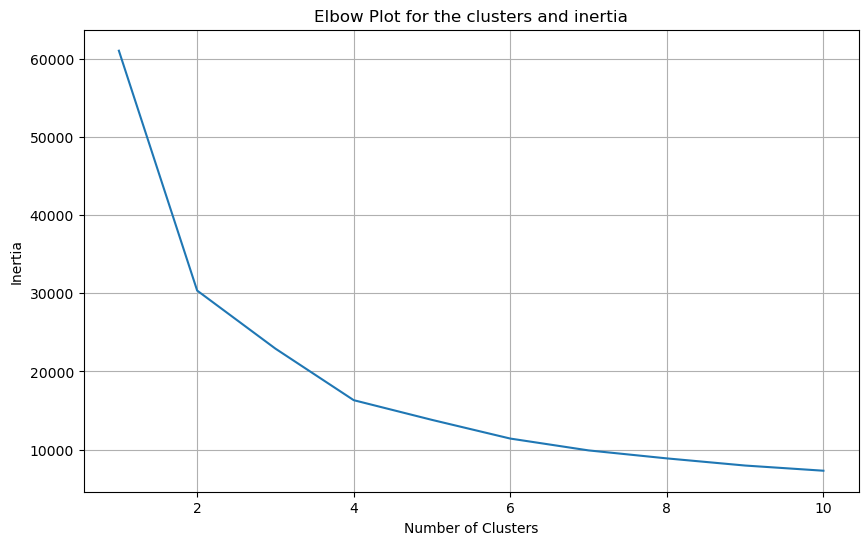

In [17]:
#plotting the inertia scores for the clusters
plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia_scores)
plt.title('Elbow Plot for the clusters and inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [18]:
## Initializing the KMeans clustering algorithm with 5 clusters.
Clustering1=KMeans(n_clusters=4)
#fitting the model with the target features
Clustering1.fit(df[['NPHI','RHOB']])
#checking for the generated clusters
Clustering1.labels_
#Assigning the labels to a new column in the dataframe
df['NPHI AND RHOB Cluster']=Clustering1.labels_
df.head()

,RHOB,GR,NPHI,PEF,DTC,NPHI AND RHOB Cluster
4238,-1.491843,-0.179292,2.523654,-1.255364,0.869531,3
4239,-1.387067,-0.010859,2.770744,-1.247886,0.690042,3
4240,-1.320646,0.028875,2.524300,-1.247450,0.554350,3
4241,-1.274390,-0.008126,2.068584,-1.261572,0.585297,3
4242,-1.335919,-0.092056,1.617342,-1.325067,0.752808,3


In [19]:
## Initializing the KMeans clustering algorithm with 5 clusters.
Clustering2=KMeans(n_clusters=4,random_state=42)
#fitting the model with the target features
Clustering1.fit(df[['NPHI','RHOB']])
#checking for the generated clusters
Clustering1.labels_
#Assigning the labels to a new column in the dataframe
df['NPHI AND RHOB Cluster']=Clustering1.labels_
df.head()

,RHOB,GR,NPHI,PEF,DTC,NPHI AND RHOB Cluster
4238,-1.491843,-0.179292,2.523654,-1.255364,0.869531,3
4239,-1.387067,-0.010859,2.770744,-1.247886,0.690042,3
4240,-1.320646,0.028875,2.524300,-1.247450,0.554350,3
4241,-1.274390,-0.008126,2.068584,-1.261572,0.585297,3
4242,-1.335919,-0.092056,1.617342,-1.325067,0.752808,3


Plotting the results

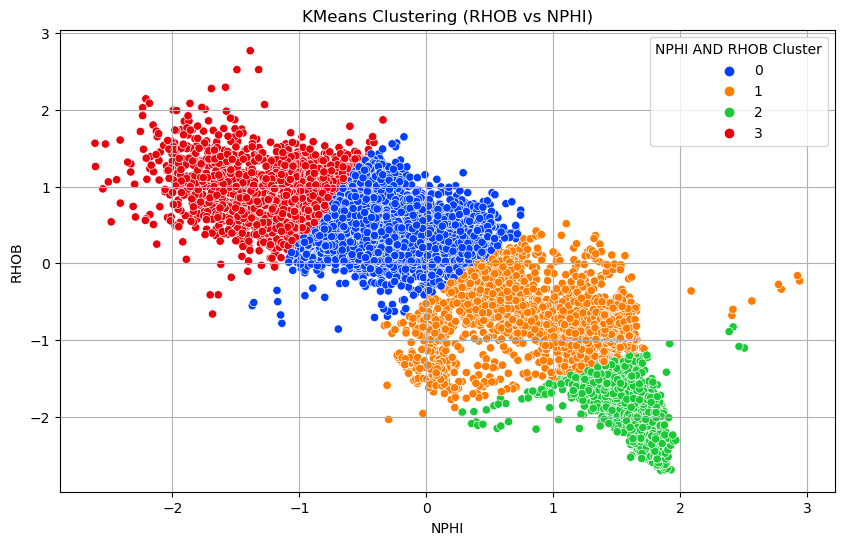

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['RHOB'],y=df['NPHI'],palette='bright',hue=df['NPHI AND RHOB Cluster'])
plt.title('KMeans Clustering (RHOB vs NPHI)')
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.grid(True)
plt.show()

INTERPRETATION

Inverse Relationship: Typically, RHOB and NPHI tend to show an inverse relationship, where dense rocks (high RHOB) often have lower porosity (low NPHI), and vice versa. This pattern suggests distinct rock formations.

High RHOB and Low NPHI: It represents dense, compact rock formations (e.g., shale or tight formations).
Low RHOB and High NPHI: Represents more porous and possibly loose formations like sandstone or unconsolidated materials.

In [21]:
#Initializing the KMeans clustering algorithm with 5 clusters.
Clustering2=KMeans(n_clusters=4)
#fitting the model with the target features
Clustering2.fit(df[['GR','RHOB']])
#checking for the generated clusters
Clustering1.labels_
#Assigning the labels to a new column in the dataframe
df['GR AND RHOB Cluster']=Clustering2.labels_
df.head()

,RHOB,GR,NPHI,PEF,DTC,NPHI AND RHOB Cluster,GR AND RHOB Cluster
4238,-1.491843,-0.179292,2.523654,-1.255364,0.869531,3,0
4239,-1.387067,-0.010859,2.770744,-1.247886,0.690042,3,0
4240,-1.320646,0.028875,2.524300,-1.247450,0.554350,3,0
4241,-1.274390,-0.008126,2.068584,-1.261572,0.585297,3,0
4242,-1.335919,-0.092056,1.617342,-1.325067,0.752808,3,0


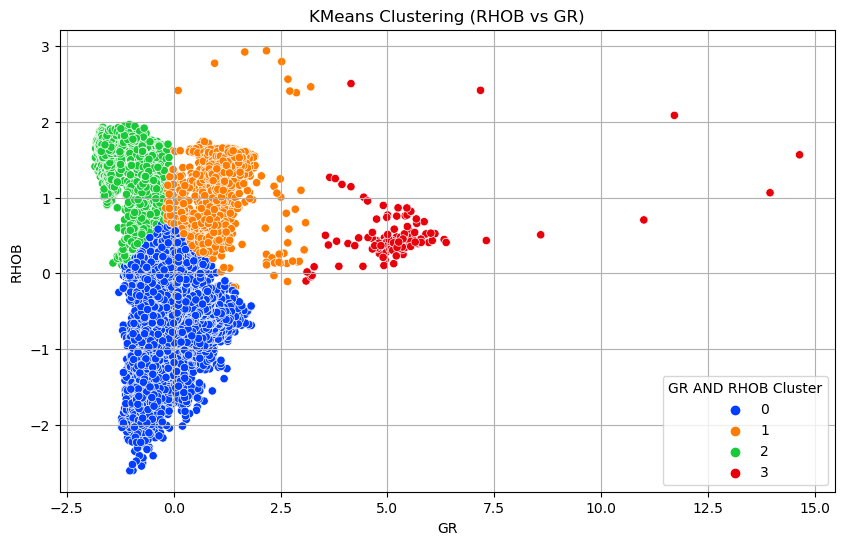

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['GR'],y=df['RHOB'],palette='bright',hue=df['GR AND RHOB Cluster'])
plt.title('KMeans Clustering (RHOB vs GR)')
plt.xlabel('GR')
plt.ylabel('RHOB')
plt.grid(True)
plt.show()

INTERPRETATION

Cluster 2: Characterized by higher RHOB and GR values, indicating dense and possibly shale-rich formations.

Cluster 3: Represented by moderate values of RHOB and GR, which might suggest less dense sedimentary layers.

Cluster 0: Contains lower RHOB and GR values, indicating a more porous and potentially sandy rock formation.

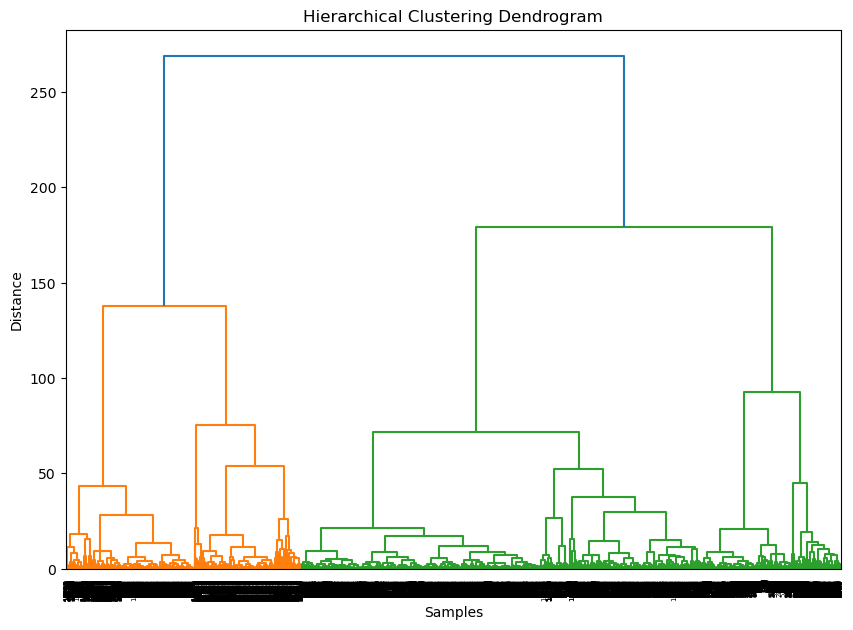

In [22]:
#This line of code is importing the `dendrogram` and `linkage` functions from the `scipy.cluster.hierarchy` module. These functions are commonly used in hierarchical clustering analysis. The `linkage` function is used to compute the hierarchical clustering of a dataset using a specified method (in this case, Ward's method). The `dendrogram` function is used to visualize the resulting hierarchical clustering as a dendrogram plot.
from scipy.cluster.hierarchy import dendrogram, linkage

#Hierarchical Clustering (using Ward's method for linkage)
hierarchical = linkage(df, method='ward')

# Plotting the dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(hierarchical)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
